In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flight-delays/airports.csv
/kaggle/input/flight-delays/airlines.csv
/kaggle/input/flight-delays/flights.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import sklearn

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df = pd.read_csv('/kaggle/input/flight-delays/flights.csv', low_memory=False)
df1= pd.read_csv('/kaggle/input/flight-delays/airlines.csv', low_memory=False)
df2= pd.read_csv('/kaggle/input/flight-delays/airports.csv',low_memory=False)

In [6]:
df.head().T

,0,1,2,3,4
YEAR,2015,2015,2015,2015,2015
MONTH,1,1,1,1,1
DAY,1,1,1,1,1
DAY_OF_WEEK,4,4,4,4,4
AIRLINE,AS,AA,US,AA,AS
FLIGHT_NUMBER,98,2336,840,258,135
TAIL_NUMBER,N407AS,N3KUAA,N171US,N3HYAA,N527AS
ORIGIN_AIRPORT,ANC,LAX,SFO,LAX,SEA
DESTINATION_AIRPORT,SEA,PBI,CLT,MIA,ANC
SCHEDULED_DEPARTURE,5,10,20,20,25


In [7]:
df.shape

(5819079, 31)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

# No Duplicates were Found

In [9]:
df.duplicated().sum()

0

# CANCELLATION_REASON has about 98.46% missing values, while AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY, and WEATHER_DELAY have around 81.72% missing values

In [10]:
df.isnull().sum() / df.shape[0]*100

YEAR                    0.000000
MONTH                   0.000000
DAY                     0.000000
DAY_OF_WEEK             0.000000
AIRLINE                 0.000000
FLIGHT_NUMBER           0.000000
TAIL_NUMBER             0.252978
ORIGIN_AIRPORT          0.000000
DESTINATION_AIRPORT     0.000000
SCHEDULED_DEPARTURE     0.000000
DEPARTURE_TIME          1.480526
DEPARTURE_DELAY         1.480526
TAXI_OUT                1.530259
WHEELS_OFF              1.530259
SCHEDULED_TIME          0.000103
ELAPSED_TIME            1.805629
AIR_TIME                1.805629
DISTANCE                0.000000
WHEELS_ON               1.589822
TAXI_IN                 1.589822
SCHEDULED_ARRIVAL       0.000000
ARRIVAL_TIME            1.589822
ARRIVAL_DELAY           1.805629
DIVERTED                0.000000
CANCELLED               0.000000
CANCELLATION_REASON    98.455357
AIR_SYSTEM_DELAY       81.724960
SECURITY_DELAY         81.724960
AIRLINE_DELAY          81.724960
LATE_AIRCRAFT_DELAY    81.724960
WEATHER_DE

## Droping these nulls value as it has a small percentage that wont affect our analysis as TAIL_NUMBER .25% , DEPARTURE_TIME 1.5% ,DEPARTURE_DELAY 1.5%,TAXI_OUT 1.5%,WHEELS_OFF 1.5% , SCHEDULED_TIME 0.0001%,ELAPSED_TIME 1.8% ,AIR_TIME 1.8% ,WHEELS_ON 1.6%,TAXI_IN 1.6%, ARRIVAL_TIME            1.6%,ARRIVAL_DELAY 1.8%

In [11]:
df.dropna(subset=['TAIL_NUMBER'], inplace=True)

In [12]:

columnsToFill = ['DEPARTURE_DELAY', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'WHEELS_ON', 'TAXI_IN', 'ARRIVAL_TIME', 'ARRIVAL_DELAY']
nulls = df.isnull().sum() / df.shape[0]*100
for i in columnsToFill:
    if nulls[i]<81 :
         df[i] = df[i].fillna(0)

In [13]:
 df.isnull().sum() / df.shape[0]*100

YEAR                    0.000000
MONTH                   0.000000
DAY                     0.000000
DAY_OF_WEEK             0.000000
AIRLINE                 0.000000
FLIGHT_NUMBER           0.000000
TAIL_NUMBER             0.000000
ORIGIN_AIRPORT          0.000000
DESTINATION_AIRPORT     0.000000
SCHEDULED_DEPARTURE     0.000000
DEPARTURE_TIME          0.000000
DEPARTURE_DELAY         0.000000
TAXI_OUT                0.000000
WHEELS_OFF              0.000000
SCHEDULED_TIME          0.000000
ELAPSED_TIME            0.000000
AIR_TIME                0.000000
DISTANCE                0.000000
WHEELS_ON               0.000000
TAXI_IN                 0.000000
SCHEDULED_ARRIVAL       0.000000
ARRIVAL_TIME            0.000000
ARRIVAL_DELAY           0.000000
DIVERTED                0.000000
CANCELLED               0.000000
CANCELLATION_REASON    98.705059
AIR_SYSTEM_DELAY       81.678611
SECURITY_DELAY         81.678611
AIRLINE_DELAY          81.678611
LATE_AIRCRAFT_DELAY    81.678611
WEATHER_DE

In [14]:
df.shape

(5804358, 31)

# Getting the values in Cancellation reason


In [15]:
print(df["CANCELLATION_REASON"].unique())

[nan 'A' 'B' 'C' 'D']


# Replacing values with:
# A: Mechanical issues with the aircraft
# B: Crew problems (e.g., staffing shortages, pilot illness)
# C: Significant weather events (e.g., storms, blizzards, low visibility)
# D: Air traffic control issues, security concerns, national aviation system delays, etc.

In [16]:

df["CANCELLATION_REASON"] = df["CANCELLATION_REASON"].replace("A" , "Mechanical issues")
df["CANCELLATION_REASON"] = df["CANCELLATION_REASON"].replace("B" , "Crews problems")
df["CANCELLATION_REASON"] = df["CANCELLATION_REASON"].replace("C" , "Significant weasther")
df["CANCELLATION_REASON"] = df["CANCELLATION_REASON"].replace("D" , "Air traffic Control")

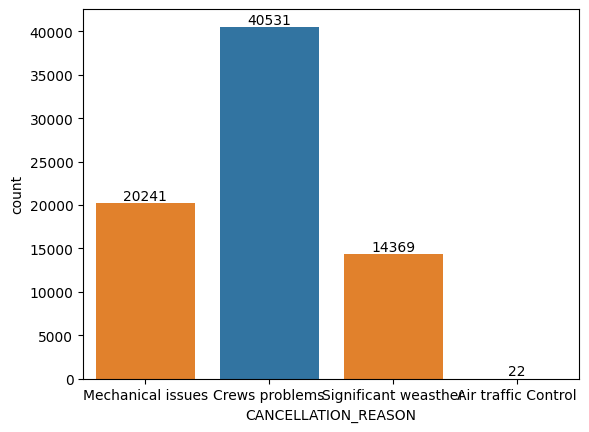

In [17]:
ax = sns.countplot(x = "CANCELLATION_REASON" , data = df , palette = ["#ff7f0e" , "#1f77b4" ])
for bars in ax.containers:
    ax.bar_label(bars)

# Total Cancellation flights : 75,163

In [18]:
df["CANCELLATION_REASON"].count()

75163

# Total Cancelltion due to the following reasons :
## 1.Crews problems : 40,531
## 2.Mechanical issues : 20,241
## 3.Signficant weather : 14,369
## 4.Air traffic control : 22

In [19]:
df["CANCELLATION_REASON"].value_counts()

CANCELLATION_REASON
Crews problems          40531
Mechanical issues       20241
Significant weasther    14369
Air traffic Control        22
Name: count, dtype: int64

# Replacing Nulls value in Cancellation reason with No Cancellation

In [20]:
df["CANCELLATION_REASON"] = df["CANCELLATION_REASON"].fillna( "No Cancellation" )

In [21]:
df.isnull().sum() / df.shape[0]*100

YEAR                    0.000000
MONTH                   0.000000
DAY                     0.000000
DAY_OF_WEEK             0.000000
AIRLINE                 0.000000
FLIGHT_NUMBER           0.000000
TAIL_NUMBER             0.000000
ORIGIN_AIRPORT          0.000000
DESTINATION_AIRPORT     0.000000
SCHEDULED_DEPARTURE     0.000000
DEPARTURE_TIME          0.000000
DEPARTURE_DELAY         0.000000
TAXI_OUT                0.000000
WHEELS_OFF              0.000000
SCHEDULED_TIME          0.000000
ELAPSED_TIME            0.000000
AIR_TIME                0.000000
DISTANCE                0.000000
WHEELS_ON               0.000000
TAXI_IN                 0.000000
SCHEDULED_ARRIVAL       0.000000
ARRIVAL_TIME            0.000000
ARRIVAL_DELAY           0.000000
DIVERTED                0.000000
CANCELLED               0.000000
CANCELLATION_REASON     0.000000
AIR_SYSTEM_DELAY       81.678611
SECURITY_DELAY         81.678611
AIRLINE_DELAY          81.678611
LATE_AIRCRAFT_DELAY    81.678611
WEATHER_DE

In [22]:
df["SECURITY_DELAY"].value_counts()
df["AIRLINE_DELAY"].value_counts()
df["LATE_AIRCRAFT_DELAY"].value_counts()
df["WEATHER_DELAY"].value_counts()


WEATHER_DELAY
0.0      998723
6.0        1649
8.0        1580
7.0        1537
10.0       1498
          ...  
386.0         1
692.0         1
563.0         1
460.0         1
793.0         1
Name: count, Length: 632, dtype: int64

# Replacing the nulls values with zero

In [23]:
columnsnullsToFill = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']
for i in columnsnullsToFill:
    df[i].fillna(0,inplace=True)

/tmp/ipykernel_17/1549485848.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(0,inplace=True)


# Total Delay for AirSystem : 564,826

In [24]:
df["AIR_SYSTEM_DELAY"].value_counts()



AIR_SYSTEM_DELAY
0.0      5239532
1.0        28003
15.0       23199
2.0        22981
3.0        21446
          ...   
518.0          1
578.0          1
453.0          1
872.0          1
477.0          1
Name: count, Length: 570, dtype: int64

In [25]:
5804358-5239532


564826

# Total Delay due to Security : 3,484

In [26]:
df["SECURITY_DELAY"].value_counts()


SECURITY_DELAY
0.0      5800874
15.0         158
8.0          127
10.0         125
12.0         124
          ...   
214.0          1
196.0          1
256.0          1
110.0          1
105.0          1
Name: count, Length: 154, dtype: int64

In [27]:
5804358 -5800874


3484

# Total Delayed due to airline : 570,022

In [28]:
df["AIRLINE_DELAY"].value_counts()


AIRLINE_DELAY
0.0       5234336
1.0         21319
2.0         21211
3.0         20656
4.0         20184
           ...   
965.0           1
1160.0          1
918.0           1
823.0           1
1636.0          1
Name: count, Length: 1067, dtype: int64

In [29]:
5804358-5234336


570022

# Total Delayed to late aircraft : 556,953

In [30]:
df["LATE_AIRCRAFT_DELAY"].value_counts()


LATE_AIRCRAFT_DELAY
0.0      5247405
15.0       14522
16.0       13824
17.0       12908
18.0       12259
          ...   
491.0          1
640.0          1
526.0          1
704.0          1
558.0          1
Name: count, Length: 695, dtype: int64

In [31]:
5804358 - 5247405

556953

# Total delayed to weather : 64,716

In [32]:
df["WEATHER_DELAY"].value_counts()

WEATHER_DELAY
0.0      5739642
6.0         1649
8.0         1580
7.0         1537
10.0        1498
          ...   
386.0          1
692.0          1
563.0          1
460.0          1
793.0          1
Name: count, Length: 632, dtype: int64

In [33]:
5804358 -5739642

64716

In [34]:
df.isnull().sum() / df.shape[0]*100

YEAR                   0.0
MONTH                  0.0
DAY                    0.0
DAY_OF_WEEK            0.0
AIRLINE                0.0
FLIGHT_NUMBER          0.0
TAIL_NUMBER            0.0
ORIGIN_AIRPORT         0.0
DESTINATION_AIRPORT    0.0
SCHEDULED_DEPARTURE    0.0
DEPARTURE_TIME         0.0
DEPARTURE_DELAY        0.0
TAXI_OUT               0.0
WHEELS_OFF             0.0
SCHEDULED_TIME         0.0
ELAPSED_TIME           0.0
AIR_TIME               0.0
DISTANCE               0.0
WHEELS_ON              0.0
TAXI_IN                0.0
SCHEDULED_ARRIVAL      0.0
ARRIVAL_TIME           0.0
ARRIVAL_DELAY          0.0
DIVERTED               0.0
CANCELLED              0.0
CANCELLATION_REASON    0.0
AIR_SYSTEM_DELAY       0.0
SECURITY_DELAY         0.0
AIRLINE_DELAY          0.0
LATE_AIRCRAFT_DELAY    0.0
WEATHER_DELAY          0.0
dtype: float64

# Total Numbers Of Diverted Flights : 15,187

In [35]:
df["DIVERTED"]= df["DIVERTED"].replace(0,"Not Diverted")
df["DIVERTED"]= df["DIVERTED"].replace(1,"Diverted")
df["DIVERTED"].value_counts()

DIVERTED
Not Diverted    5789171
Diverted          15187
Name: count, dtype: int64

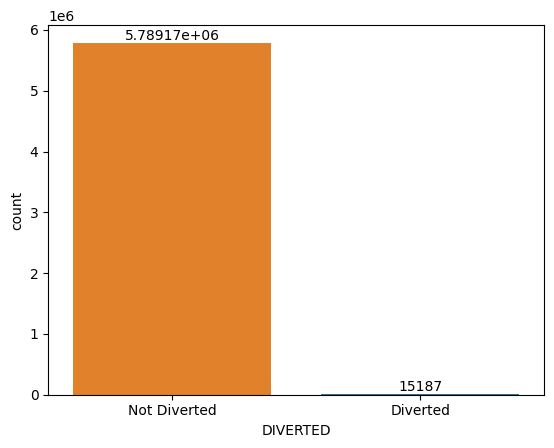

In [36]:
ax = sns.countplot(x = "DIVERTED" , data = df , palette = ["#ff7f0e" , "#1f77b4" ])
for bars in ax.containers:
    ax.bar_label(bars)

# Total Cancelled Flights : 75,163

In [37]:
df["CANCELLED"]=df["CANCELLED"].replace(0,"Not Cancelled")
df["CANCELLED"]=df["CANCELLED"].replace(1,"Cancelled")
df["CANCELLED"].value_counts()

CANCELLED
Not Cancelled    5729195
Cancelled          75163
Name: count, dtype: int64

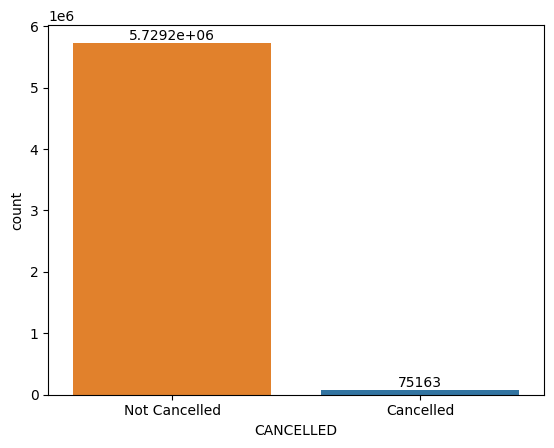

In [38]:
ax = sns.countplot(x = "CANCELLED" , data = df , palette = ["#ff7f0e" , "#1f77b4" ])
for bars in ax.containers:
    ax.bar_label(bars)

In [39]:
X = df[['DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF','WHEELS_ON', 'TAXI_IN','ARRIVAL_DELAY']]
y = df['SCHEDULED_ARRIVAL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Mean Squared Error: 79196.0895609543
R² Score: 0.6922275721910796
                 Coefficient
DEPARTURE_DELAY    -0.871138
TAXI_OUT           -4.233786
WHEELS_OFF          0.185549
WHEELS_ON           0.639584
TAXI_IN            -4.262312
ARRIVAL_DELAY       1.298821


In [40]:
df.head().T

,0,1,2,3,4
YEAR,2015,2015,2015,2015,2015
MONTH,1,1,1,1,1
DAY,1,1,1,1,1
DAY_OF_WEEK,4,4,4,4,4
AIRLINE,AS,AA,US,AA,AS
FLIGHT_NUMBER,98,2336,840,258,135
TAIL_NUMBER,N407AS,N3KUAA,N171US,N3HYAA,N527AS
ORIGIN_AIRPORT,ANC,LAX,SFO,LAX,SEA
DESTINATION_AIRPORT,SEA,PBI,CLT,MIA,ANC
SCHEDULED_DEPARTURE,5,10,20,20,25


In [41]:
# Casting Datatype of Departure time and arrival time and scheduled arrival into integer then do a function to convert it into time hh:mm

In [42]:
df['SCHEDULED_DEPARTURE'] = df['SCHEDULED_DEPARTURE'].astype(int)
df['DEPARTURE_TIME'] = df['DEPARTURE_TIME'].astype(int)
df['ARRIVAL_TIME'] = df['ARRIVAL_TIME'].astype(int)
df['SCHEDULED_ARRIVAL'] = df['SCHEDULED_ARRIVAL'].astype(int)

def format_time(departure_time):
    hours = departure_time // 100
    minutes = departure_time % 100
    return f"{hours:02}:{minutes:02}"
df['SCHEDULED_DEPARTURE'] = df['SCHEDULED_DEPARTURE'].apply(format_time)
df['DEPARTURE_TIME'] = df['DEPARTURE_TIME'].apply(format_time)
df['ARRIVAL_TIME'] = df['ARRIVAL_TIME'].apply(format_time)
df['SCHEDULED_ARRIVAL'] = df['SCHEDULED_ARRIVAL'].apply(format_time)

In [43]:
import datetime

In [44]:
def fixingTime(stringTime):
  if stringTime == '24:00':
    return '00:00'
  else:
    return stringTime

In [45]:
df['SCHEDULED_DEPARTURE'] = df['SCHEDULED_DEPARTURE'].apply(fixingTime)

df['DEPARTURE_TIME'] = df['DEPARTURE_TIME'].apply(fixingTime)

df['ARRIVAL_TIME'] = df['ARRIVAL_TIME'].apply(fixingTime)

df['SCHEDULED_ARRIVAL'] = df['SCHEDULED_ARRIVAL'].apply(fixingTime)


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5804358 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  object 
 10  DEPARTURE_TIME       object 
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    object 
 21  ARRIVAL_TIME         object 
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             object 
 24  CAN

In [47]:
def Time_Grouping(timestring):
    hour = int(timestring.split(':')[0])
    if (1 <= hour <= 11) or (hour == 0):
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else: 
        return 'Evening'
    
#df['ArrivalTime_Group']= df['ARRIVAL_TIME'].str[:2].astype('int')//100   
df['ArrivalTime_Group'] = df['ARRIVAL_TIME'].apply(Time_Grouping)
#df['DepartureTime_Group']=df['DEPARTURE_TIME'].str[:2].astype('int')//100
df['DepartureTime_Group'] = df['DEPARTURE_TIME'].apply(Time_Grouping)



In [48]:
df.head().T

,0,1,2,3,4
YEAR,2015,2015,2015,2015,2015
MONTH,1,1,1,1,1
DAY,1,1,1,1,1
DAY_OF_WEEK,4,4,4,4,4
AIRLINE,AS,AA,US,AA,AS
FLIGHT_NUMBER,98,2336,840,258,135
TAIL_NUMBER,N407AS,N3KUAA,N171US,N3HYAA,N527AS
ORIGIN_AIRPORT,ANC,LAX,SFO,LAX,SEA
DESTINATION_AIRPORT,SEA,PBI,CLT,MIA,ANC
SCHEDULED_DEPARTURE,00:05,00:10,00:20,00:20,00:25


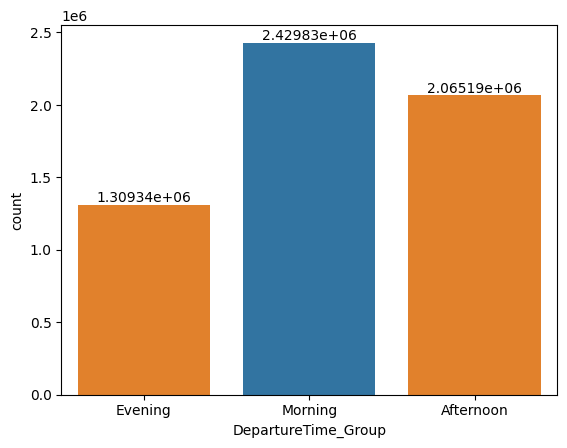

In [49]:
ax = sns.countplot(x = "DepartureTime_Group" , data = df , palette = ["#ff7f0e" , "#1f77b4" ])
for bars in ax.containers:
    ax.bar_label(bars)

In [50]:
df["DepartureTime_Group"].value_counts()

DepartureTime_Group
Morning      2429829
Afternoon    2065193
Evening      1309336
Name: count, dtype: int64

In [51]:
df["ArrivalTime_Group"].value_counts()

ArrivalTime_Group
Afternoon    2058909
Evening      1889633
Morning      1855816
Name: count, dtype: int64

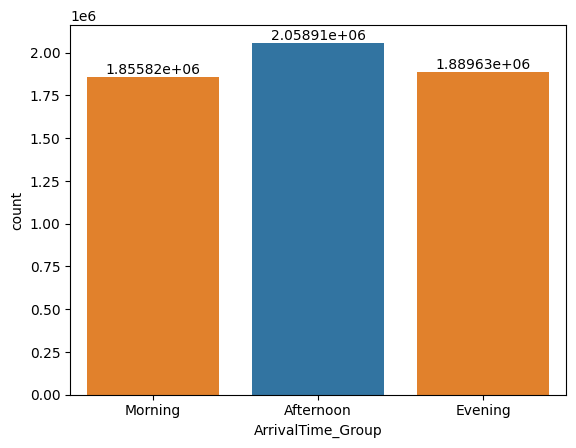

In [52]:
ax = sns.countplot(x = "ArrivalTime_Group" , data = df , palette = ["#ff7f0e" , "#1f77b4" ])
for bars in ax.containers:
    ax.bar_label(bars)

# Casting all the float DataType into integer

In [53]:
FloatColumns = df.select_dtypes(include=['float64'])
for j in FloatColumns:
         df[j] = df[j].astype(int)
         

In [54]:
df.head().T

,0,1,2,3,4
YEAR,2015,2015,2015,2015,2015
MONTH,1,1,1,1,1
DAY,1,1,1,1,1
DAY_OF_WEEK,4,4,4,4,4
AIRLINE,AS,AA,US,AA,AS
FLIGHT_NUMBER,98,2336,840,258,135
TAIL_NUMBER,N407AS,N3KUAA,N171US,N3HYAA,N527AS
ORIGIN_AIRPORT,ANC,LAX,SFO,LAX,SEA
DESTINATION_AIRPORT,SEA,PBI,CLT,MIA,ANC
SCHEDULED_DEPARTURE,00:05,00:10,00:20,00:20,00:25


array([[<Axes: title={'center': 'YEAR'}>,
        <Axes: title={'center': 'MONTH'}>,
        <Axes: title={'center': 'DAY'}>,
        <Axes: title={'center': 'DAY_OF_WEEK'}>],
       [<Axes: title={'center': 'FLIGHT_NUMBER'}>,
        <Axes: title={'center': 'DEPARTURE_DELAY'}>,
        <Axes: title={'center': 'TAXI_OUT'}>,
        <Axes: title={'center': 'WHEELS_OFF'}>],
       [<Axes: title={'center': 'SCHEDULED_TIME'}>,
        <Axes: title={'center': 'ELAPSED_TIME'}>,
        <Axes: title={'center': 'AIR_TIME'}>,
        <Axes: title={'center': 'DISTANCE'}>],
       [<Axes: title={'center': 'WHEELS_ON'}>,
        <Axes: title={'center': 'TAXI_IN'}>,
        <Axes: title={'center': 'ARRIVAL_DELAY'}>,
        <Axes: title={'center': 'AIR_SYSTEM_DELAY'}>],
       [<Axes: title={'center': 'SECURITY_DELAY'}>,
        <Axes: title={'center': 'AIRLINE_DELAY'}>,
        <Axes: title={'center': 'LATE_AIRCRAFT_DELAY'}>,
        <Axes: title={'center': 'WEATHER_DELAY'}>]], dtype=object)

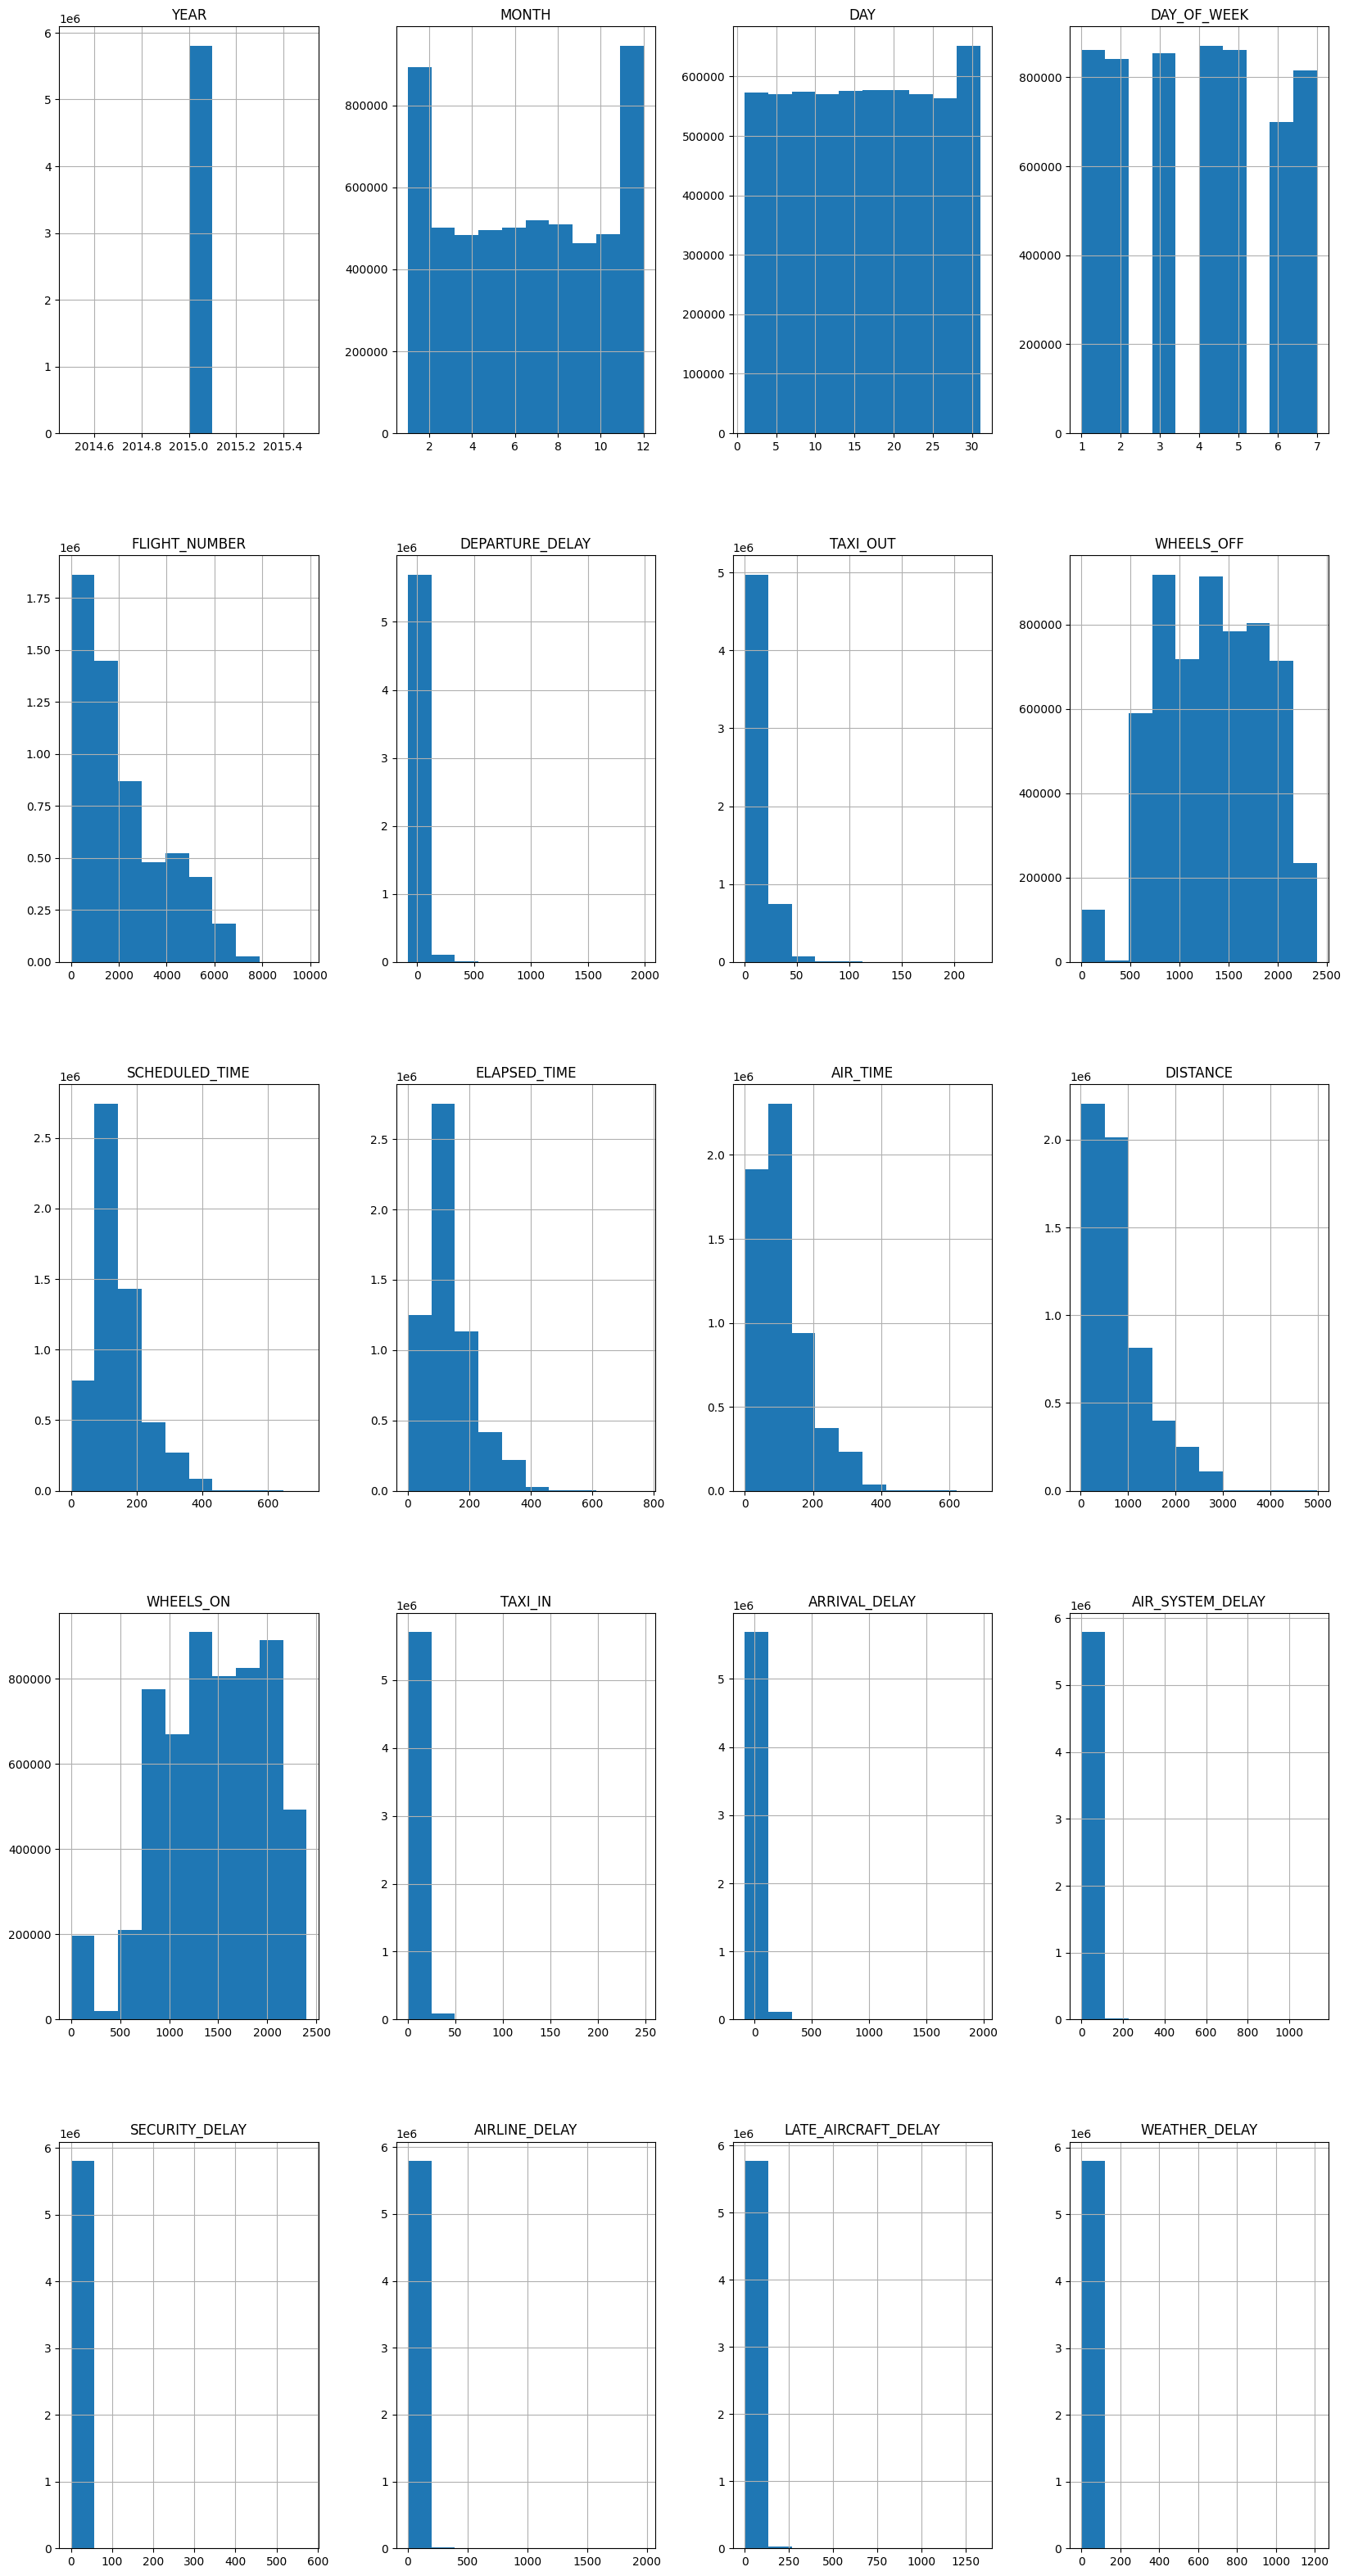

In [55]:
df.hist(figsize = (20 , 40))

<Axes: >

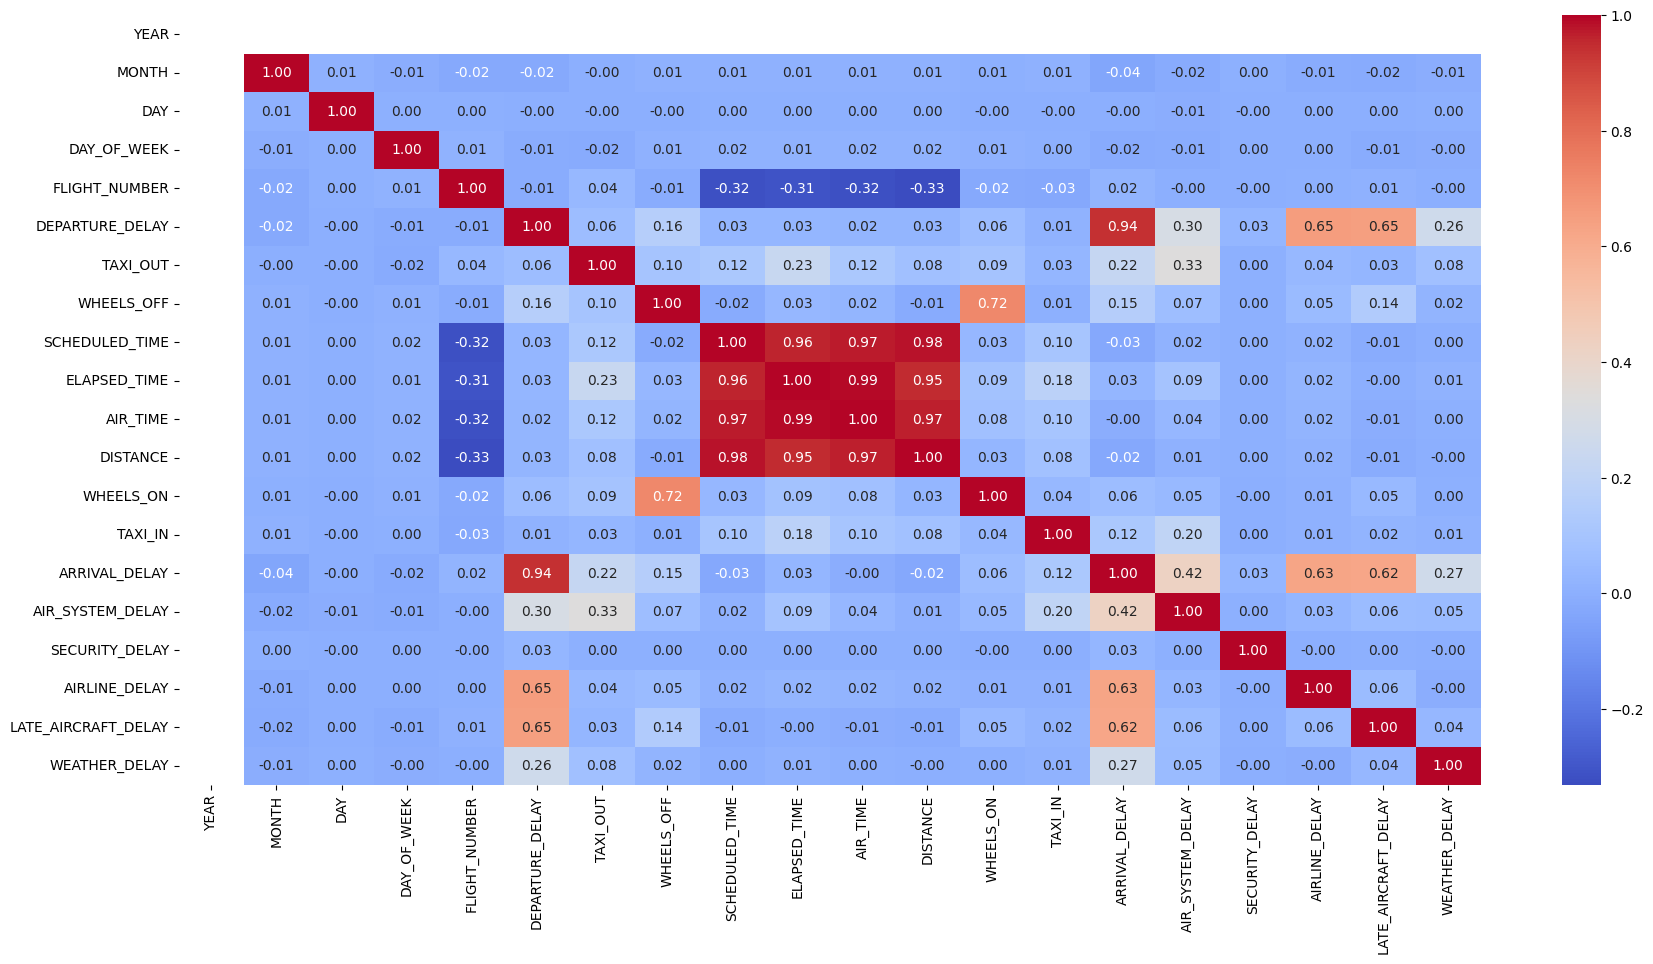

In [56]:
numeric_df = df.select_dtypes('int')
corr_matrix=numeric_df.corr()
plt.figure(figsize=(21,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Sample of strong correlation betweem wheels on and arrival time 

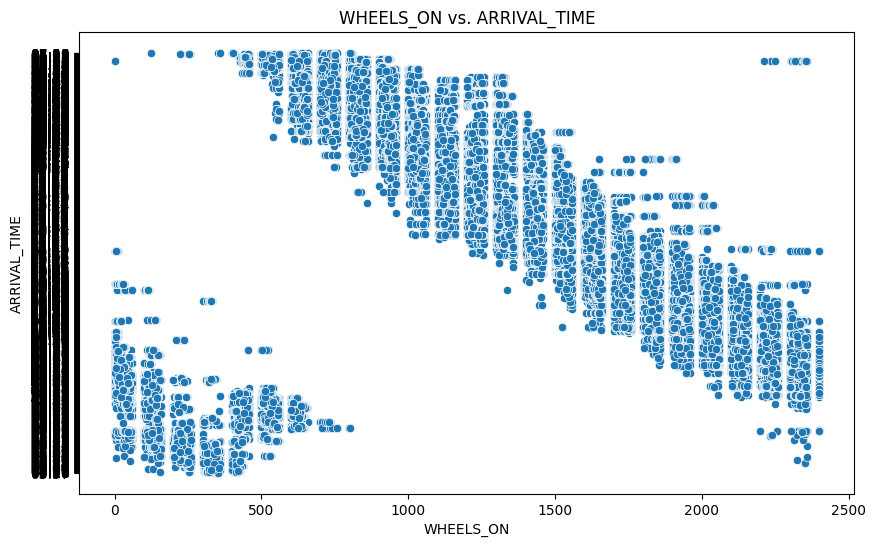

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['WHEELS_ON'], y=df['ARRIVAL_TIME'])
plt.title('WHEELS_ON vs. ARRIVAL_TIME')
plt.xlabel('WHEELS_ON')
plt.ylabel('ARRIVAL_TIME')
plt.show()

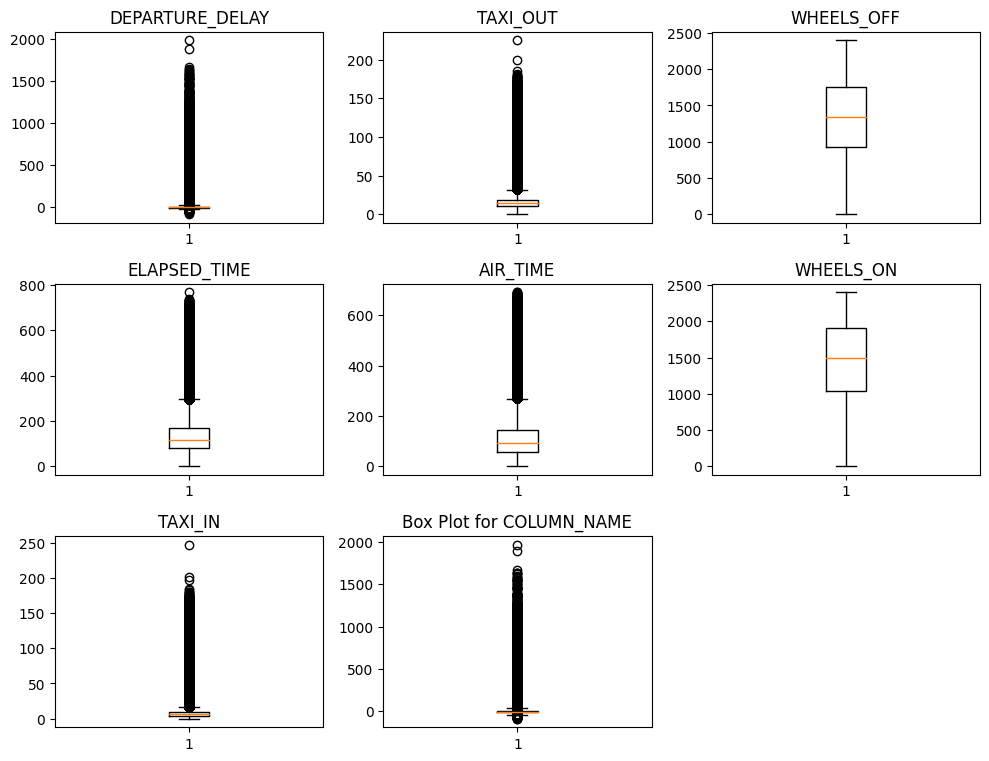

In [58]:
plt.figure(figsize=(10, 10))
lst= ['DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'ELAPSED_TIME', 'AIR_TIME', 'WHEELS_ON', 'TAXI_IN',  'ARRIVAL_DELAY']
for i, column in enumerate(lst):
    plt.subplot(4, 3, i + 1) 
    plt.boxplot(df[column])
    plt.title(column)

plt.tight_layout()
plt.title('Box Plot for COLUMN_NAME')
plt.show()

In [59]:
df.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5804358.0,5.804358e+06,5.804358e+06,5.804358e+06,5.804358e+06,5.804358e+06,5.804358e+06,5.804358e+06,5.804358e+06,5.804358e+06,5.804358e+06,5.804358e+06,5.804358e+06,5.804358e+06,5.804358e+06,5.804358e+06,5.804358e+06,5.804358e+06,5.804358e+06,5.804358e+06
mean,2015.0,6.529055e+00,1.570280e+01,3.928568e+00,2.175147e+03,9.254843e+00,1.586586e+01,1.339792e+03,1.416359e+02,1.348736e+02,1.117447e+02,8.220585e+02,1.451747e+03,7.335325e+00,4.338458e+00,2.469827e+00,1.395245e-02,3.475484e+00,4.300550e+00,5.341216e-01
std,0.0,3.403378e+00,8.781139e+00,1.988376e+00,1.758231e+03,3.686654e+01,9.021261e+00,5.178045e+02,7.518278e+01,7.555919e+01,7.303097e+01,6.075355e+02,5.455784e+02,5.665514e+00,3.896827e+01,1.307180e+01,9.179480e-01,2.188199e+01,2.059915e+01,8.818586e+00
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.310000e+02,-5.000000e+00,1.100000e+01,9.260000e+02,8.500000e+01,8.100000e+01,5.900000e+01,3.730000e+02,1.044000e+03,4.000000e+00,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.691000e+03,-1.000000e+00,1.400000e+01,1.336000e+03,1.230000e+02,1.170000e+02,9.300000e+01,6.470000e+02,1.501000e+03,6.000000e+00,-5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.234000e+03,7.000000e+00,1.900000e+01,1.751000e+03,1.730000e+02,1.670000e+02,1.430000e+02,1.062000e+03,1.908000e+03,9.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,1.988000e+03,2.250000e+02,2.400000e+03,7.180000e+02,7.660000e+02,6.900000e+02,4.983000e+03,2.400000e+03,2.480000e+02,1.971000e+03,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [60]:
df['DEPARTURE_DELAY'].max()

1988

#

# Typical Departure Delay: The median (-1.0) tells you that a typical flight actually departs slightly ahead of schedule. This means that despite the outliers, more flights depart early than late
# Typical Arrival Delay : The median (-5.0) tells that a typical flight actually arrives slight ahead of schedule. this means that despite the outliers, more flights arrive early than late 

# In summary: Most flights depart on time or a little early,as same as arriving more early or on time but there are a few flights with significant delays that are impacting the average delay time, same as arriving delay time 

In [61]:
df1.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [62]:
df1.duplicated().sum()

0

# Total of Airlines Numbers : 14

In [63]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IATA_CODE  14 non-null     object
 1   AIRLINE    14 non-null     object
dtypes: object(2)
memory usage: 352.0+ bytes


# No Nulls were found

In [64]:
df1.isnull().sum()

IATA_CODE    0
AIRLINE      0
dtype: int64

In [65]:
df1.describe().T

,count,unique,top,freq
IATA_CODE,14,14,UA,1
AIRLINE,14,14,United Air Lines Inc.,1


In [66]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


# No Duplicates

In [67]:
df2.duplicated().sum()

0

# 3 Nulls were founds in lattude and longttude

In [68]:
df2.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

# Droping nulls for lattude and longttude

In [69]:
df2.dropna(inplace = True)

In [70]:
df2.rename(columns = {"IATA_CODE" : "ORIGIN_AIRPORT"}, inplace=True)

# Rename Airline to IATA_CODE 

In [71]:

df.rename(columns = {"AIRLINE" : "IATA_CODE"}, inplace=True)

In [72]:
merged_df = pd.merge(df, df1, on='IATA_CODE', how='left')

final_df = pd.merge(merged_df, df2, on="ORIGIN_AIRPORT", how='left')

In [73]:
final_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,IATA_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,WEATHER_DELAY,ArrivalTime_Group,DepartureTime_Group,AIRLINE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,00:05,...,0,Morning,Evening,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,00:10,...,0,Morning,Morning,American Airlines Inc.,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
2,2015,1,1,4,US,840,N171US,SFO,CLT,00:20,...,0,Morning,Morning,US Airways Inc.,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,00:20,...,0,Morning,Morning,American Airlines Inc.,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,00:25,...,0,Morning,Morning,Alaska Airlines Inc.,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931


In [74]:
final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,5804358.0,2015.000000,0.000000,2015.00000,2015.00000,2015.00000,2015.00000,2015.00000
MONTH,5804358.0,6.529055,3.403378,1.00000,4.00000,7.00000,9.00000,12.00000
DAY,5804358.0,15.702801,8.781139,1.00000,8.00000,16.00000,23.00000,31.00000
DAY_OF_WEEK,5804358.0,3.928568,1.988376,1.00000,2.00000,4.00000,6.00000,7.00000
FLIGHT_NUMBER,5804358.0,2175.147287,1758.231226,1.00000,731.00000,1691.00000,3234.00000,9855.00000
DEPARTURE_DELAY,5804358.0,9.254843,36.866543,-82.00000,-5.00000,-1.00000,7.00000,1988.00000
TAXI_OUT,5804358.0,15.865861,9.021261,0.00000,11.00000,14.00000,19.00000,225.00000
WHEELS_OFF,5804358.0,1339.791989,517.804507,0.00000,926.00000,1336.00000,1751.00000,2400.00000
SCHEDULED_TIME,5804358.0,141.635879,75.182780,0.00000,85.00000,123.00000,173.00000,718.00000
ELAPSED_TIME,5804358.0,134.873566,75.559195,0.00000,81.00000,117.00000,167.00000,766.00000


# Top 10 months caused most weather delayed 
# December had the Longest delayed

In [75]:
WEATHER_DELAY =final_df.groupby(["MONTH"])["WEATHER_DELAY"].max().sort_values(ascending = False).head(10)
WEATHER_DELAY

MONTH
12    1211
2     1152
11    1120
3     1118
6     1068
5     1021
10     995
1      938
8      896
7      836
Name: WEATHER_DELAY, dtype: int64

# Feb and June were the most weather delayed took a place

<Axes: xlabel='MONTH', ylabel='WEATHER_DELAY'>

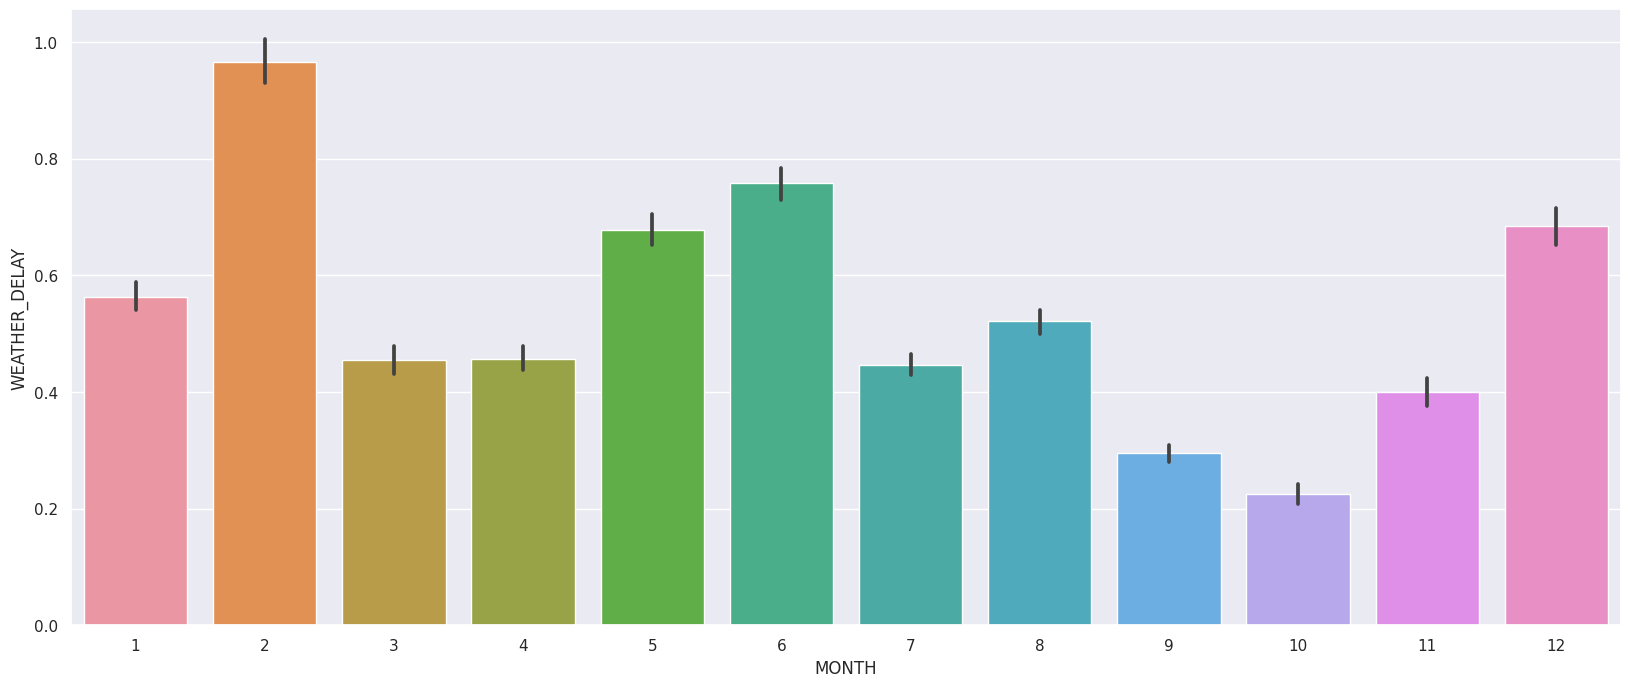

In [76]:
sns.set(rc = {"figure.figsize" : (20 , 8)})
sns.barplot(x = final_df["MONTH"] , y = final_df["WEATHER_DELAY"] , data = WEATHER_DELAY)

# Top 10 Airlines delayed due to late aircraft 
## American Airlines Inc. was the most one

In [77]:
LATE_AIRCRAFT_DELAY=final_df.groupby(["AIRLINE"])["LATE_AIRCRAFT_DELAY"].max().sort_values(ascending = False).head(10)
LATE_AIRCRAFT_DELAY

AIRLINE
American Airlines Inc.          1331
United Air Lines Inc.           1294
Atlantic Southeast Airlines     1033
American Eagle Airlines Inc.    1014
Delta Air Lines Inc.            1010
Frontier Airlines Inc.           770
Alaska Airlines Inc.             730
US Airways Inc.                  711
Spirit Air Lines                 666
Skywest Airlines Inc.            618
Name: LATE_AIRCRAFT_DELAY, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:533: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = data.get(y, y)


<Axes: xlabel='AIRLINE', ylabel='LATE_AIRCRAFT_DELAY'>

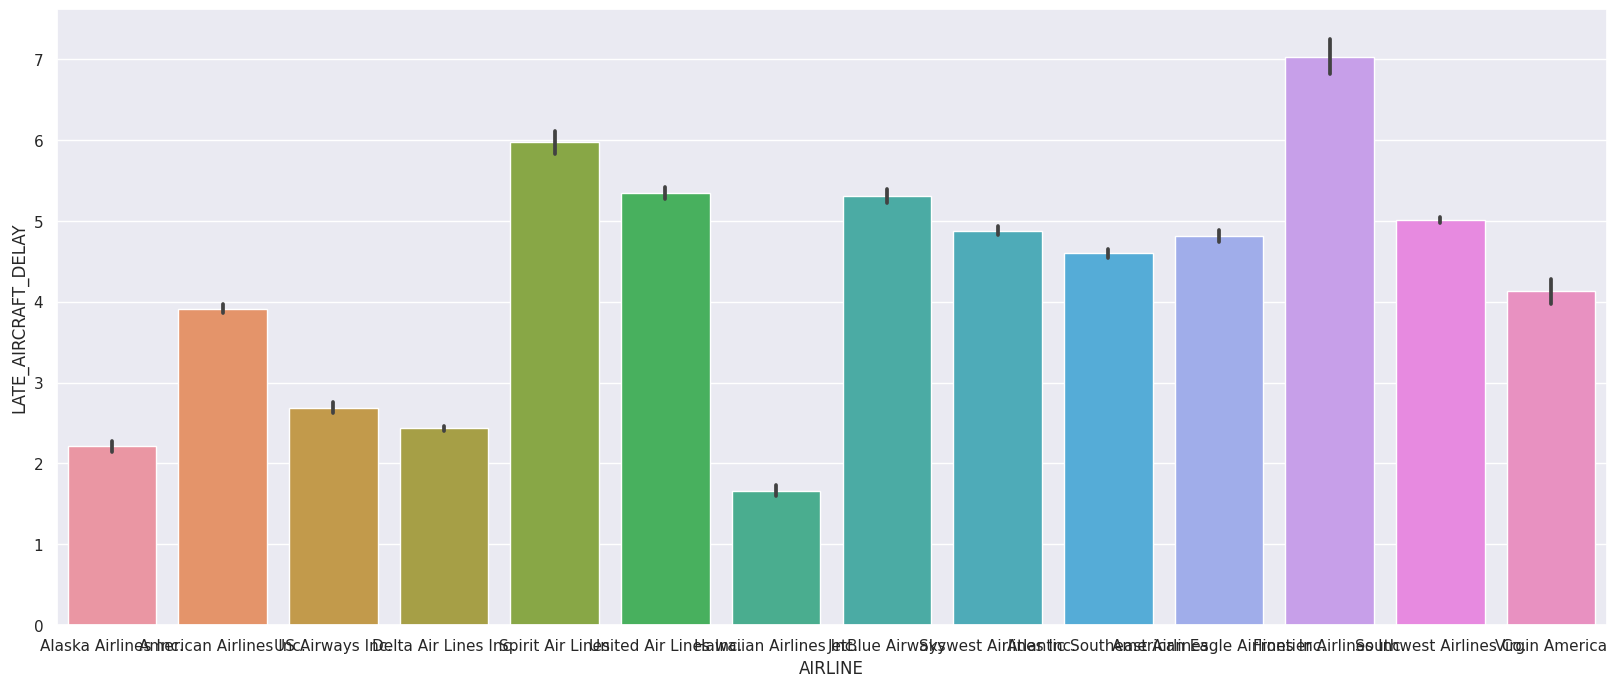

In [78]:
sns.set(rc = {"figure.figsize" : (20 , 8)})
sns.barplot(x = final_df["AIRLINE"] , y = final_df["LATE_AIRCRAFT_DELAY"] , data = LATE_AIRCRAFT_DELAY)

# Top 10 Airline was delayed 

In [79]:
AIRLINE_DELAY=final_df.groupby(["AIRLINE"])["AIRLINE_DELAY"].max().sort_values(ascending = False).head(10)
AIRLINE_DELAY

AIRLINE
American Airlines Inc.          1971
American Eagle Airlines Inc.    1528
Hawaiian Airlines Inc.          1467
Delta Air Lines Inc.            1274
Skywest Airlines Inc.           1233
Atlantic Southeast Airlines     1218
United Air Lines Inc.           1185
Frontier Airlines Inc.           996
Alaska Airlines Inc.             950
JetBlue Airways                  942
Name: AIRLINE_DELAY, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:533: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = data.get(y, y)


<Axes: xlabel='AIRLINE', ylabel='AIRLINE_DELAY'>

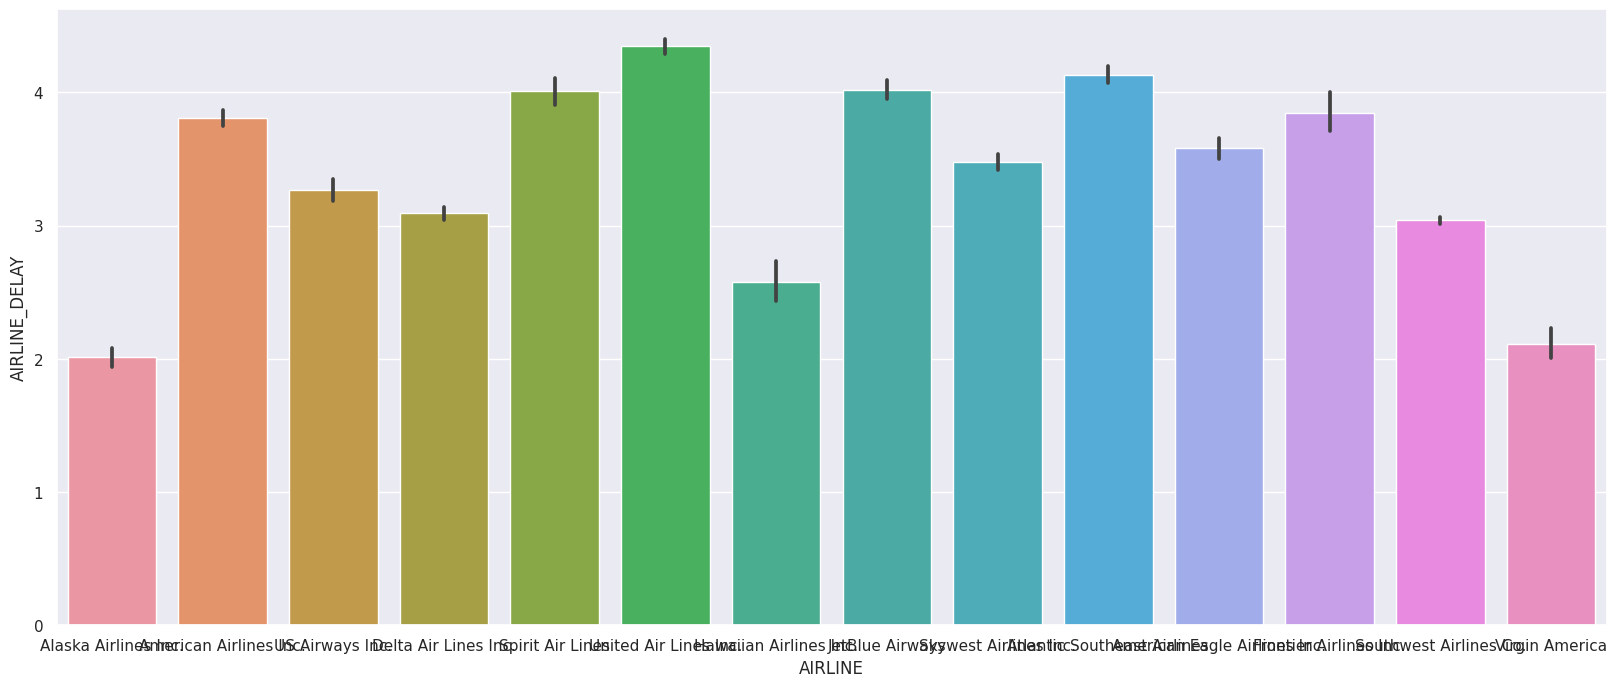

In [80]:
sns.set(rc = {"figure.figsize" : (20 , 8)})
sns.barplot(x = final_df["AIRLINE"] , y = final_df["AIRLINE_DELAY"] , data = AIRLINE_DELAY)

# Top Airport has the largest security delay 
## Dickinson Theodore Roosevelt Regional Airport was recorded as the most

In [81]:
SECURITY_DELAY = final_df.groupby(["AIRPORT"])["SECURITY_DELAY"].max().sort_values(ascending = False).head(10)
SECURITY_DELAY

AIRPORT
Dickinson Theodore Roosevelt Regional Airport                             573
San Diego International Airport (Lindbergh Field)                         440
Los Angeles International Airport                                         364
Minneapolis-Saint Paul International Airport                              256
Orlando International Airport                                             241
Phoenix Sky Harbor International Airport                                  237
Raleigh-Durham International Airport                                      227
Baltimore-Washington International Airport                                227
John F. Kennedy International Airport (New York International Airport)    221
Louis Armstrong New Orleans International Airport                         221
Name: SECURITY_DELAY, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:533: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = data.get(y, y)


<Axes: xlabel='AIRPORT', ylabel='SECURITY_DELAY'>

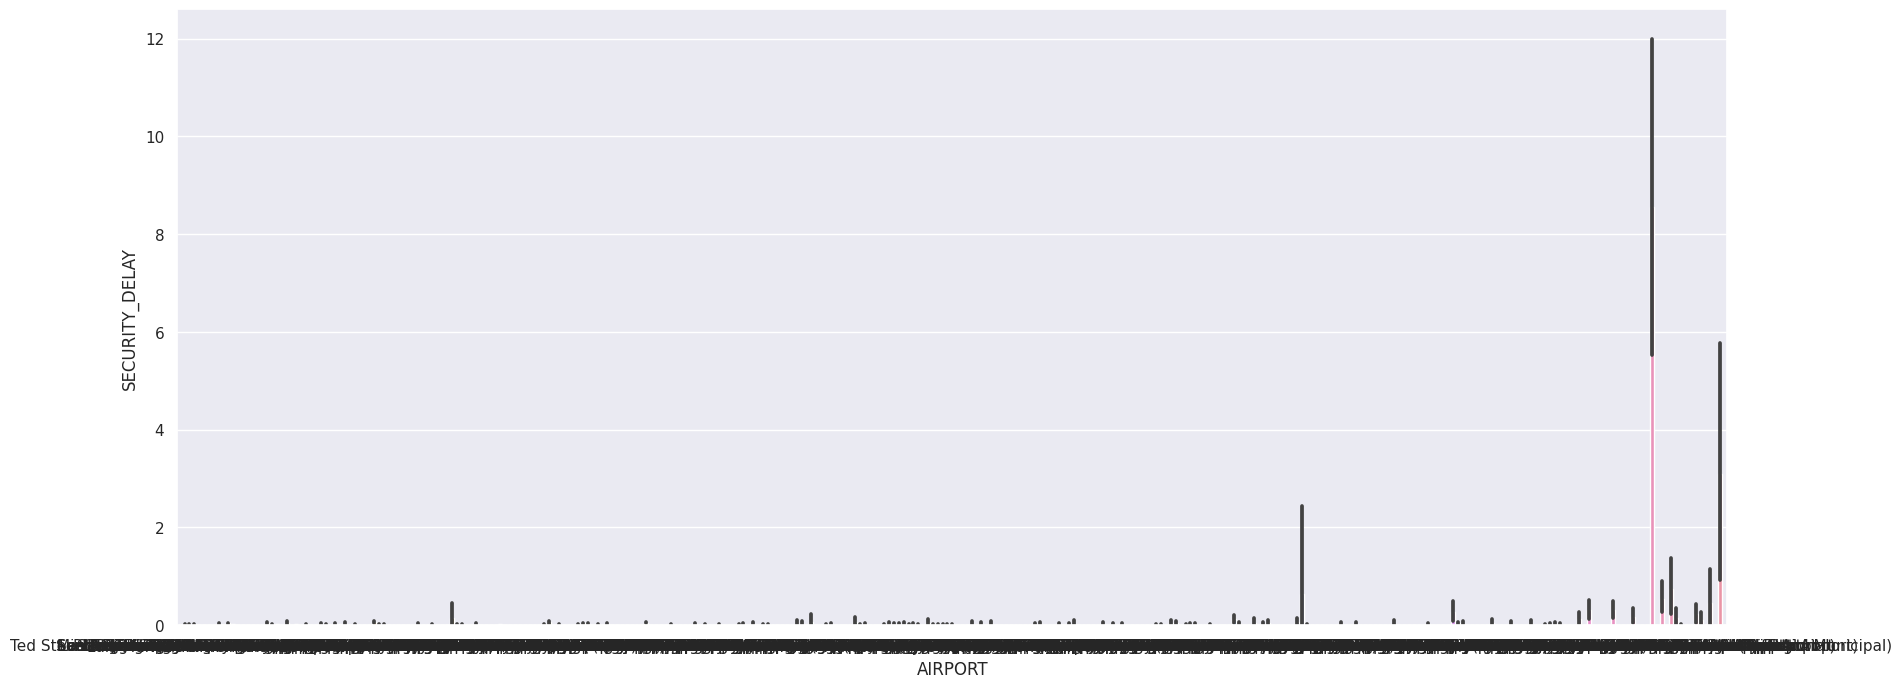

In [82]:
sns.set(rc = {"figure.figsize" : (20 , 8)})  
sns.barplot(x = final_df["AIRPORT"] , y = final_df["SECURITY_DELAY"] , data = SECURITY_DELAY)


# Top 10 airlines delayed according to air_system 
## American Eagle Airlines Inc was the most with more than 18 hours delayed

In [83]:
air_system_delay = final_df.groupby(["AIRLINE"])["AIR_SYSTEM_DELAY"].max().sort_values(ascending = False).head(10)
air_system_delay

AIRLINE
American Eagle Airlines Inc.    1134
Frontier Airlines Inc.          1101
Skywest Airlines Inc.           1049
Delta Air Lines Inc.             991
American Airlines Inc.           916
United Air Lines Inc.            798
Atlantic Southeast Airlines      728
Spirit Air Lines                 674
Southwest Airlines Co.           602
JetBlue Airways                  600
Name: AIR_SYSTEM_DELAY, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:533: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = data.get(y, y)


<Axes: xlabel='AIRLINE', ylabel='AIR_SYSTEM_DELAY'>

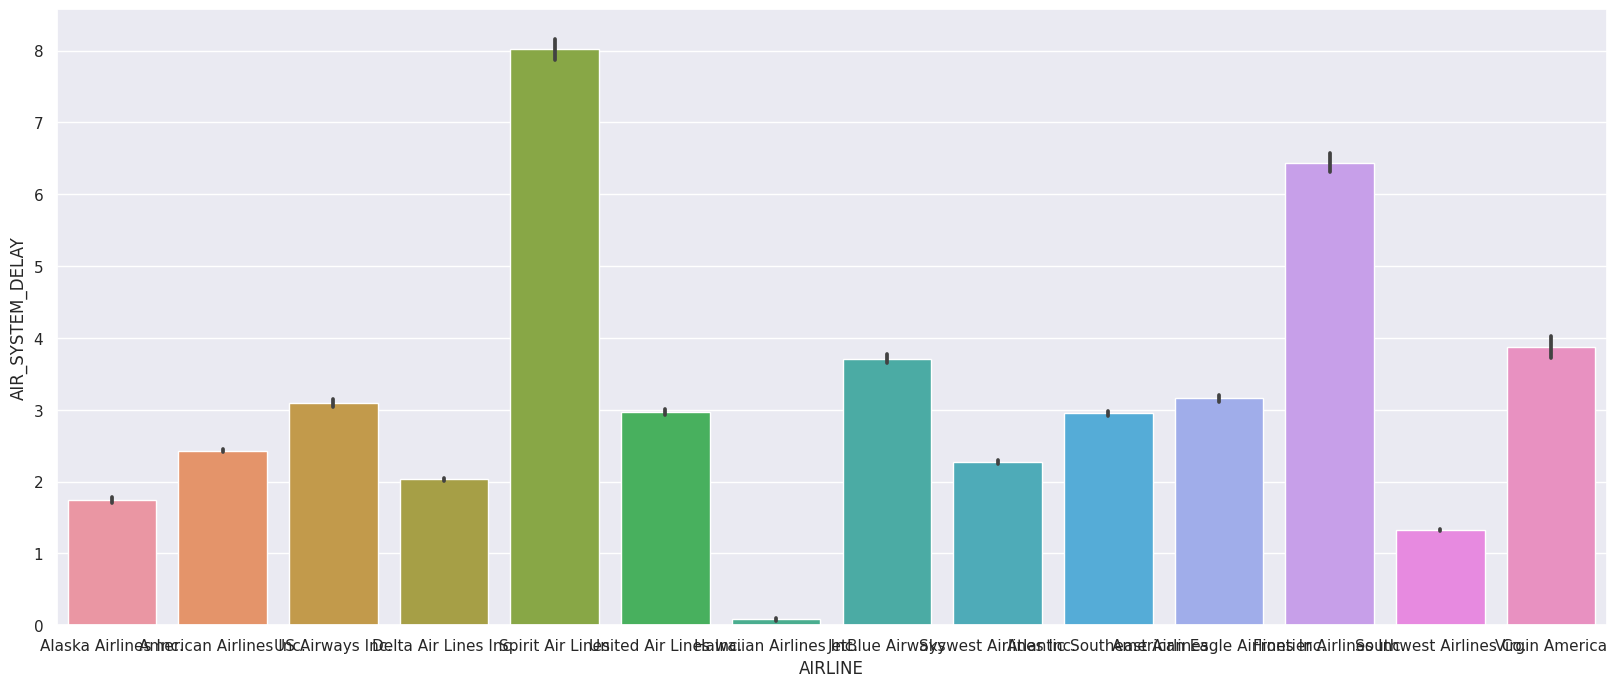

In [84]:
sns.set(rc = {"figure.figsize" : (20 , 8)})
sns.barplot(x = final_df["AIRLINE"] , y = final_df["AIR_SYSTEM_DELAY"] , data = air_system_delay)

# maxium wheels off were took a place with 727 flights run by 727 airlines with 40 mins 

# Top 10 Airlines took long time in wheels off 

In [85]:
wheels_off = final_df.groupby(["AIRLINE"])["WHEELS_OFF"].max().sort_values(ascending = False).head(10)
wheels_off

AIRLINE
Alaska Airlines Inc.            2400
American Airlines Inc.          2400
American Eagle Airlines Inc.    2400
Atlantic Southeast Airlines     2400
Delta Air Lines Inc.            2400
Frontier Airlines Inc.          2400
JetBlue Airways                 2400
Skywest Airlines Inc.           2400
Southwest Airlines Co.          2400
Spirit Air Lines                2400
Name: WHEELS_OFF, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:532: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = data.get(x, x)


<Axes: xlabel='WHEELS_OFF', ylabel='AIRLINE'>

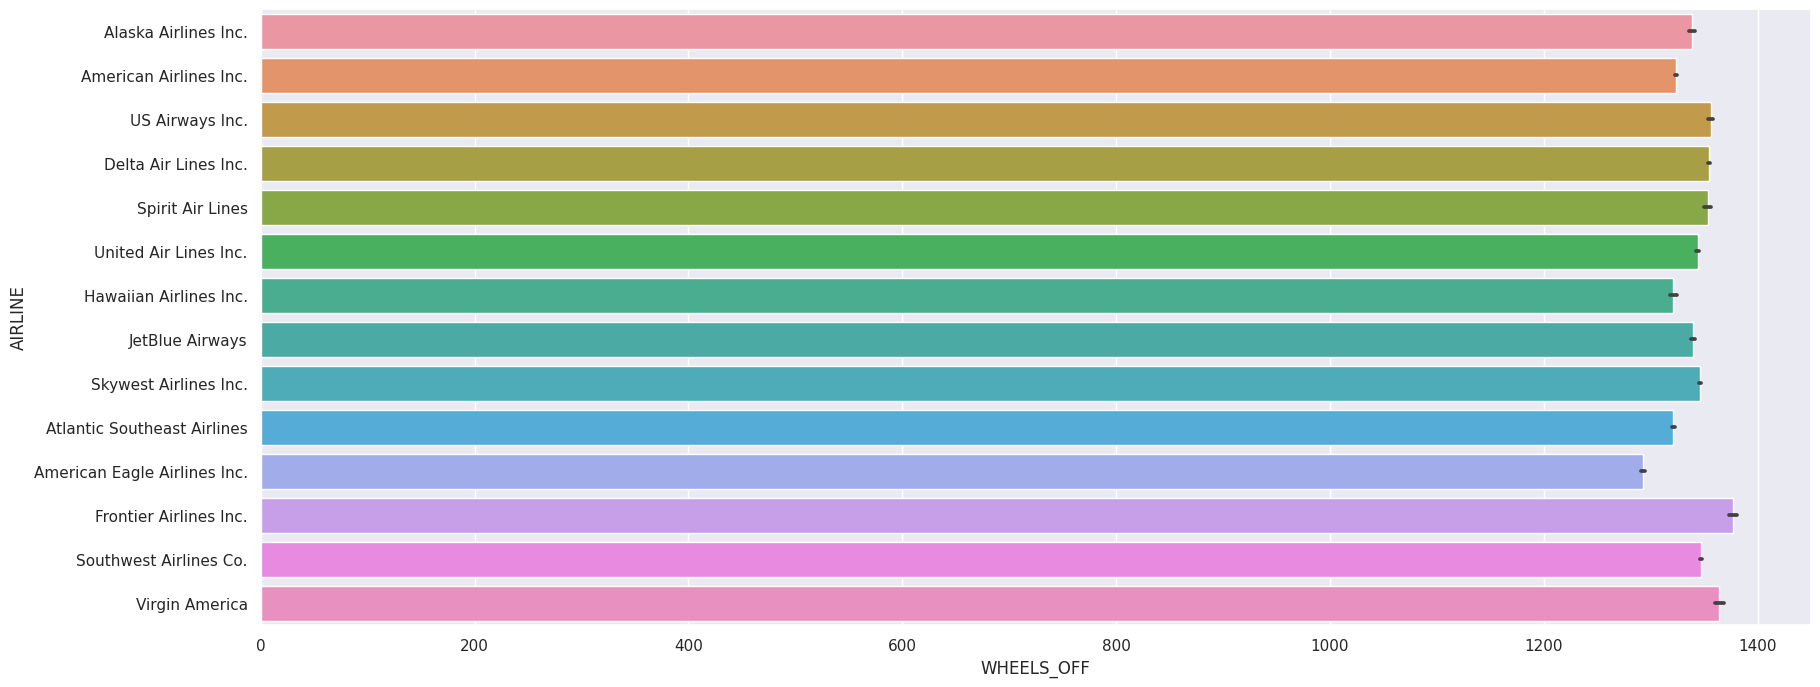

In [86]:
sns.set(rc = {"figure.figsize" : (20 , 8)})
sns.barplot(x = final_df["WHEELS_OFF"] , y = final_df["AIRLINE"] , data = wheels_off)

In [87]:
final_df[final_df['WHEELS_OFF'] == final_df['WHEELS_OFF'].max()].count().unique()


array([727, 668])

# Top 10 Airports took largest taxi out 

In [88]:
taxi_out = final_df.groupby(["AIRPORT"])["TAXI_OUT"].max().sort_values(ascending = False).head(10)
taxi_out

AIRPORT
Dallas/Fort Worth International Airport                                   225
George Bush Intercontinental Airport                                      200
John F. Kennedy International Airport (New York International Airport)    180
LaGuardia Airport (Marine Air Terminal)                                   177
Chicago Midway International Airport                                      177
Norman Y. Mineta San José International Airport                           176
Hartsfield-Jackson Atlanta International Airport                          172
Gen. Edward Lawrence Logan International Airport                          172
McGhee Tyson Airport                                                      171
Washington Dulles International Airport                                   170
Name: TAXI_OUT, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:533: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = data.get(y, y)


<Axes: xlabel='AIRPORT', ylabel='TAXI_OUT'>

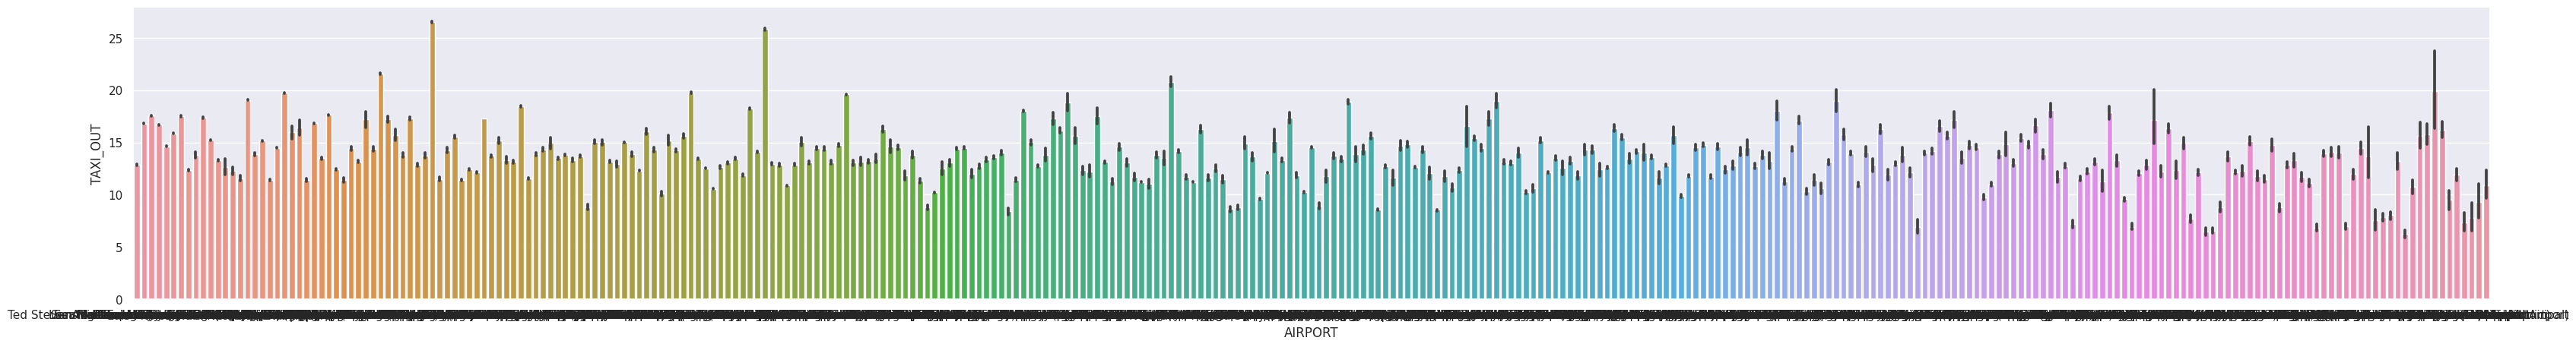

In [89]:
sns.set(rc = {"figure.figsize" : (40 , 5)})
sns.barplot(x = final_df["AIRPORT"] , y = final_df["TAXI_OUT"] , data = taxi_out)

# Top 10 Airport has cancelled flight
## Chicago O'Hare International Airport was the most 

In [90]:
CANCELLED =final_df[final_df['CANCELLED'] == 'Cancelled'].groupby('AIRPORT')['CANCELLED'].count().sort_values(ascending=False).head(10)
CANCELLED




AIRPORT
Chicago O'Hare International Airport                                      7298
Dallas/Fort Worth International Airport                                   5745
LaGuardia Airport (Marine Air Terminal)                                   3332
Hartsfield-Jackson Atlanta International Airport                          2359
Newark Liberty International Airport                                      2267
Chicago Midway International Airport                                      1823
Los Angeles International Airport                                         1783
John F. Kennedy International Airport (New York International Airport)    1706
San Francisco International Airport                                       1644
Gen. Edward Lawrence Logan International Airport                          1582
Name: CANCELLED, dtype: int64

# Top 10 Airlines cancelled flights
## Atlantic Southeast Airlines was the most cancelled airline

In [91]:
CANCELLED =final_df[final_df['CANCELLED'] == 'Cancelled'].groupby('AIRLINE')['CANCELLED'].count().sort_values(ascending=False).head(10)
CANCELLED


AIRLINE
Atlantic Southeast Airlines     15161
American Eagle Airlines Inc.    14977
Southwest Airlines Co.          14638
Skywest Airlines Inc.            9855
American Airlines Inc.           8608
JetBlue Airways                  4276
Delta Air Lines Inc.             3798
Spirit Air Lines                 2004
Alaska Airlines Inc.              669
Virgin America                    534
Name: CANCELLED, dtype: int64

# Top 10 airlines diverted flights
## Southwest Airlines Co. was the most diverted flights

In [92]:
DIVERTED =final_df[final_df['DIVERTED'] == 'Diverted'].groupby('AIRLINE')['DIVERTED'].count().sort_values(ascending=False).head(10)
DIVERTED

AIRLINE
Southwest Airlines Co.          3409
American Airlines Inc.          2130
Atlantic Southeast Airlines     1994
Delta Air Lines Inc.            1782
Skywest Airlines Inc.           1579
United Air Lines Inc.           1388
American Eagle Airlines Inc.     816
JetBlue Airways                  730
US Airways Inc.                  425
Alaska Airlines Inc.             413
Name: DIVERTED, dtype: int64

# Dallas/Fort Worth International Airport was recorded as maxium taxi out with 3 hours and 45 minutes due to AIR_SYSTEM_DELAY and WEATHER_DELAY With flight number : 125 Airline : American Airlines Inc. on 27 Feb

In [93]:
final_df[final_df['TAXI_OUT'] == final_df['TAXI_OUT'].max()].T

,872565
YEAR,2015
MONTH,2
DAY,27
DAY_OF_WEEK,5
IATA_CODE,AA
FLIGHT_NUMBER,125
TAIL_NUMBER,N4XBAA
ORIGIN_AIRPORT,DFW
DESTINATION_AIRPORT,ATL
SCHEDULED_DEPARTURE,14:15


# Flight number : 1322 , Airline : American Airlines Inc was the largest departure delay on 23 jan with 33 hours delayed from Los Angeles International Airport  

In [94]:
final_df[final_df['ARRIVAL_DELAY'] == final_df['ARRIVAL_DELAY'].max()]

,YEAR,MONTH,DAY,DAY_OF_WEEK,IATA_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,WEATHER_DELAY,ArrivalTime_Group,DepartureTime_Group,AIRLINE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
337196,2015,1,23,5,AA,1322,N598AA,BHM,DFW,07:00,...,0,Evening,Afternoon,American Airlines Inc.,Birmingham-Shuttlesworth International Airport,Birmingham,AL,USA,33.56294,-86.75355


In [95]:
df[df['DEPARTURE_DELAY'] == df['DEPARTURE_DELAY'].max()]

,YEAR,MONTH,DAY,DAY_OF_WEEK,IATA_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,ArrivalTime_Group,DepartureTime_Group
337720,2015,1,23,5,AA,1322,N598AA,BHM,DFW,07:00,...,Not Diverted,Not Cancelled,No Cancellation,0,0,1971,0,0,Evening,Afternoon


In [96]:
df2.rename(columns = {"ORIGIN_AIRPORT" : "DESTINATION_AIRPORT"}, inplace=True)

In [97]:
merged_df = pd.merge(df, df1, on='IATA_CODE', how='left')

final_df = pd.merge(merged_df, df2, on="DESTINATION_AIRPORT", how='left')

In [98]:
final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,5804358.0,2015.000000,0.000000,2015.00000,2015.00000,2015.00000,2015.00000,2015.00000
MONTH,5804358.0,6.529055,3.403378,1.00000,4.00000,7.00000,9.00000,12.00000
DAY,5804358.0,15.702801,8.781139,1.00000,8.00000,16.00000,23.00000,31.00000
DAY_OF_WEEK,5804358.0,3.928568,1.988376,1.00000,2.00000,4.00000,6.00000,7.00000
FLIGHT_NUMBER,5804358.0,2175.147287,1758.231226,1.00000,731.00000,1691.00000,3234.00000,9855.00000
DEPARTURE_DELAY,5804358.0,9.254843,36.866543,-82.00000,-5.00000,-1.00000,7.00000,1988.00000
TAXI_OUT,5804358.0,15.865861,9.021261,0.00000,11.00000,14.00000,19.00000,225.00000
WHEELS_OFF,5804358.0,1339.791989,517.804507,0.00000,926.00000,1336.00000,1751.00000,2400.00000
SCHEDULED_TIME,5804358.0,141.635879,75.182780,0.00000,85.00000,123.00000,173.00000,718.00000
ELAPSED_TIME,5804358.0,134.873566,75.559195,0.00000,81.00000,117.00000,167.00000,766.00000


# Top 10 Airlines with most wheels on time with 40 mins

In [99]:
wheels_on = final_df.groupby(["AIRLINE"])["WHEELS_ON"].max().sort_values(ascending = False).head(10)
wheels_on

AIRLINE
Alaska Airlines Inc.            2400
American Airlines Inc.          2400
American Eagle Airlines Inc.    2400
Atlantic Southeast Airlines     2400
Delta Air Lines Inc.            2400
Frontier Airlines Inc.          2400
Hawaiian Airlines Inc.          2400
JetBlue Airways                 2400
Skywest Airlines Inc.           2400
Southwest Airlines Co.          2400
Name: WHEELS_ON, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:532: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = data.get(x, x)


<Axes: xlabel='WHEELS_ON', ylabel='AIRLINE'>

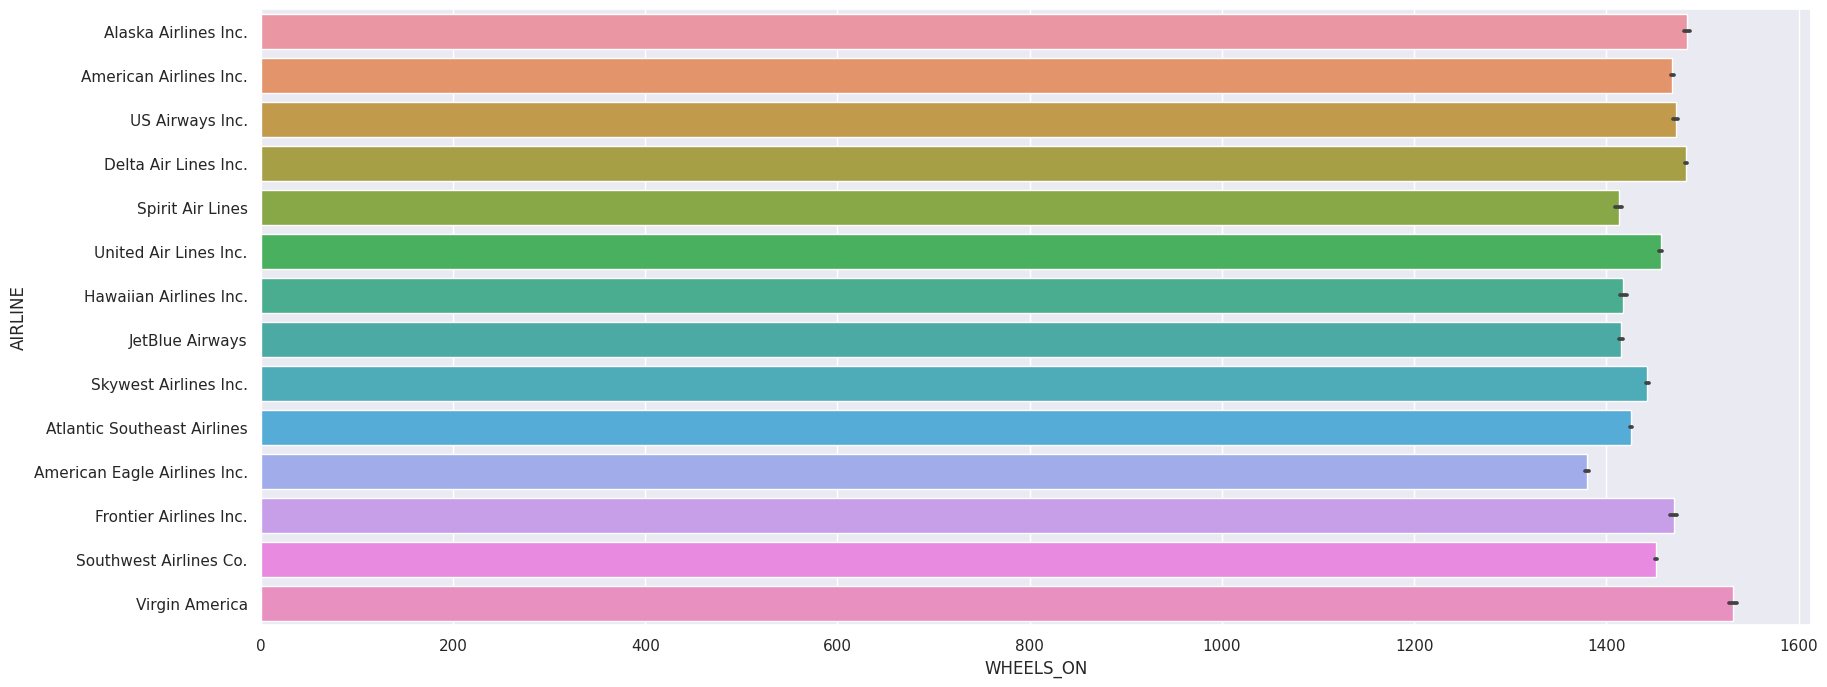

In [100]:
sns.set(rc = {"figure.figsize" : (20 , 8)})
sns.barplot(x = final_df["WHEELS_ON"] , y = final_df["AIRLINE"] , data = wheels_on)

# Top 10 airport with most taxi in time 
# Chicago O'Hare International Airport was the Longest one with more than 4 mins

In [101]:
taxi_in = final_df.groupby(["AIRPORT"])["TAXI_IN"].max().sort_values(ascending = False).head(10)
taxi_in

AIRPORT
Chicago O'Hare International Airport                                      248
John F. Kennedy International Airport (New York International Airport)    202
LaGuardia Airport (Marine Air Terminal)                                   197
Dallas/Fort Worth International Airport                                   183
Baltimore-Washington International Airport                                180
Ronald Reagan Washington National Airport                                 177
Philadelphia International Airport                                        173
City of Colorado Springs Municipal Airport                                172
Orlando International Airport                                             171
Austin-Bergstrom International Airport                                    167
Name: TAXI_IN, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:533: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = data.get(y, y)


<Axes: xlabel='AIRPORT', ylabel='TAXI_IN'>

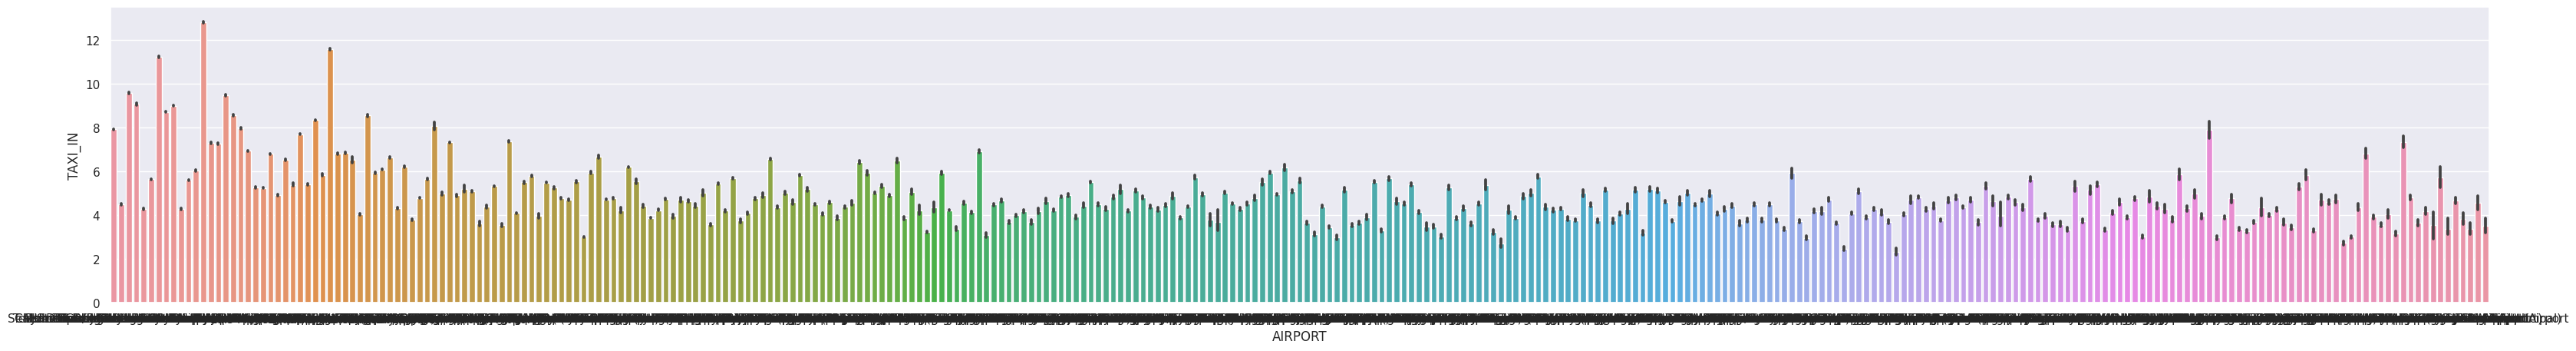

In [102]:
sns.set(rc = {"figure.figsize" : (40 , 5)})
sns.barplot(x = final_df["AIRPORT"] , y = final_df["TAXI_IN"] , data = taxi_in)

# Top 10 Airport with the lowest taxi in time 

## Wilmington Airport was the lowest taxi in time

In [103]:
taxi_in_lowest = final_df.groupby(["AIRPORT"])["TAXI_IN"].min().sort_values(ascending = False).head(10)
taxi_in_lowest

AIRPORT
Wilmington Airport                                  5
Pago Pago International Airport (Tafuna Airport)    4
Westerly State Airport                              3
Dillingham Airport                                  2
Lewiston-Nez Perce County Airport                   2
King Salmon Airport                                 1
Martha's Vineyard Airport                           1
Aberdeen Regional Airport                           0
Norfolk International Airport                       0
Orlando International Airport                       0
Name: TAXI_IN, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:533: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = data.get(y, y)


<Axes: xlabel='AIRPORT', ylabel='TAXI_IN'>

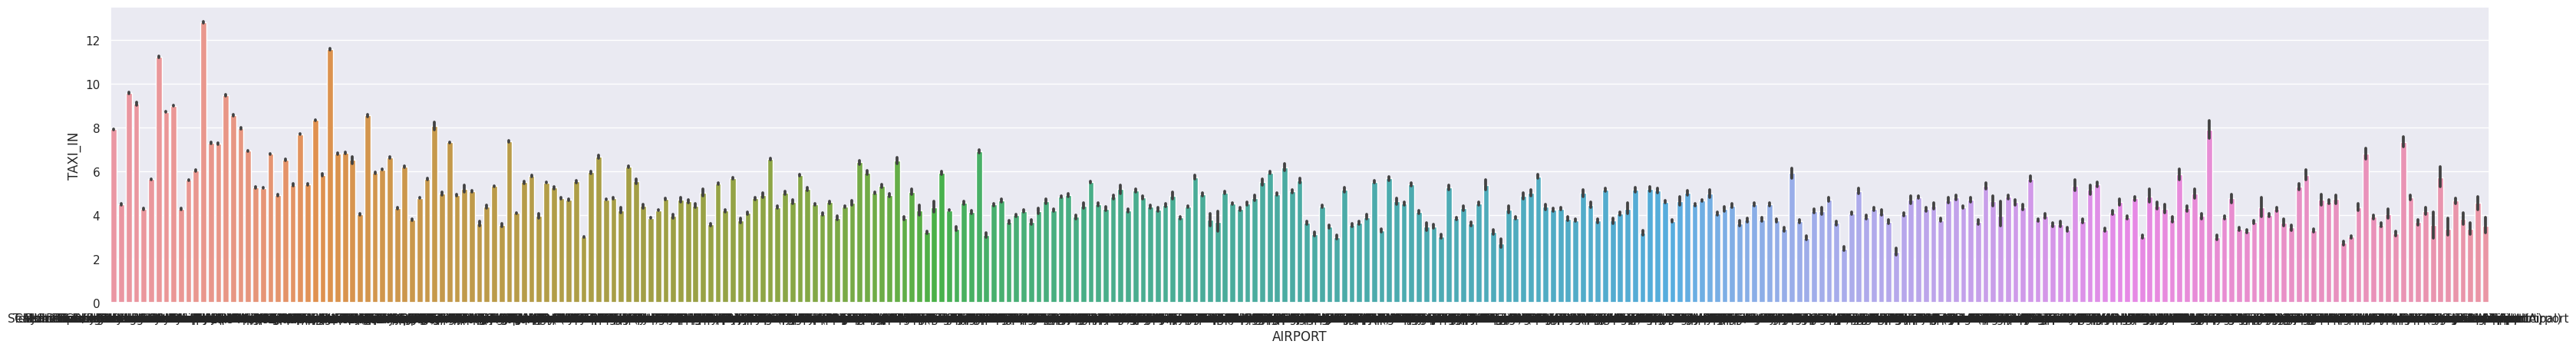

In [104]:
sns.set(rc = {"figure.figsize" : (40 , 5)})
sns.barplot(x = final_df["AIRPORT"] , y = final_df["TAXI_IN"] , data = taxi_in_lowest)

In [105]:
df.to_csv('flights_cleaned_data.csv', index=False)
df1.to_csv('airlines_cleaned_data.csv', index=False)
df2.to_csv('airport_cleaned_data.csv', index=False)